### Neural Computation Exercise 3: Gradient Descent

In this exercise, we'll develop implementations of gradient descent and its minibatch algorithms. As in Exercise 2, we will use the Boston Housing dataset. Instead of using the exact solution, we use gradient descent and minibatch gradient descent to solve this problem.

In this exercise, you will learn the following
* implement the `gradient descent` method
* implement the `minibatch gradient descent` method

In [1]:
import matplotlib
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt 
from sklearn import preprocessing   # for normalization

## Boston Housing Data

The Boston Housing data is one of the  datasets available in sklearn.
We can import the dataset and preprocess it as follows. Note we add a feature of $1$ to `x_input` to get a n x (d+1) matrix `x_in`

In [3]:
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston_data = load_boston()
data = boston_data['data']
x_input = data  # a data matrix
y_target = boston_data['target'] # a vector for all outputs
# add a feature 1 to the dataset, then we do not need to consider the bias and weight separately
x_in = np.concatenate([np.ones([np.shape(x_input)[0], 1]), x_input], axis=1)
# we normalize the data so that each has regularity
x_in = preprocessing.normalize(x_in)

## Linear Model

A linear regression model in one variable has the following form 
$$
f(x)=\mathbf{w}^\top \mathbf{x}.
$$
The following function computes the output of the linear model on a data matrix of size n x (d+1).

In [4]:
def linearmat_2(w, X):
    '''
    a vectorization of linearmat_1 in lab 2.
    Input: w is a weight parameter (including the bias), and X is a data matrix (n x (d+1)) (including the feature)
    Output: a vector containing the predictions of linear models
    '''
    return np.dot(X, w)

## Cost Function

We defined the following `mean square error` function for a linear regression problem using the square loss:
$$
C(\mathbf{y}, \mathbf{t}) = \frac{1}{2n}(\mathbf{y}-\mathbf{t})^\top (\mathbf{y}-\mathbf{t}).
$$
The python implementation is as follows

In [5]:
def cost(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and outputs `y`, at weights `w`.
    '''
    residual = y - linearmat_2(w, X)  # get the residual
    err = np.dot(residual, residual) / (2 * len(y)) # compute the error
    
    return err

## Gradient Computation

Our methods require to use the gradient of the `cost` function. As discussed in the previous lecture, the gradient can be computed by
$$\nabla C(\mathbf{w}) =\frac{1}{n}X^\top\big(X\mathbf{w}-\mathbf{y}\big)$$
In the following, we present the python implementation on the gradient computation

In [6]:
# Vectorized gradient function
def gradfn(weights, X, y):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,d+1) of input features including the feature $1$
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''

    # TODO: Insert your code to compute the gradient
    
    return np.dot(X.T, np.dot(X, weights) - y) / len(y)

## Gradient Descent

Gradient Descent iteratively updates the model by moving along the negative direction
$$\mathbf{w}^{(t+1)} \leftarrow \mathbf{w}^{(t)} - \eta\nabla C(\mathbf{w}^{(t)}),$$ 
where $\eta$ is a learning rate and $\nabla C(w^{(t)})$ is the gradient evaluated at current parameter value $\mathbf{w}^{(t)}$. In the following, we give the python implementation of the gradient descent on the linear regression problem. Here, we use `idx_res` to store the indices of iterations where we have computed the cost, and use `err_res` to store the cost of models at these iterations. These will be used to plot how the `cost` will behave `versus iteration` number.

In [7]:
def solve_via_gradient_descent(X, y, print_every=100,
                               niter=2000, eta=1):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
          `print_every` - we report performance every 'print_every' iterations
          `niter` - the number of iterates allowed
          `eta` - learning rate
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    idx_res = []
    err_res = []
    for k in range(niter):
        # TODO: Insert your code to update w by gradient descent
        w = w - eta * gradfn(w, X, y)        
        if k % print_every == print_every - 1:
            print('Weight after %d iteration: %s' % (k + 1, str(w)))
            idx_res.append(k + 1)
            err_res.append(cost(w, X, y))
    plt.plot(idx_res, err_res, color="red", linewidth=2.5, linestyle="-")
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    return w, idx_res, err_res

Now we apply **gradient descent** to solve the **Boston House Price** prediction problem, and get the weight `w_gd`, the indices `idx_gd` and the errors 'err_gd' on these indices 

Weight after 100 iteration: [ 8.75238115e-02 -1.19723553e+00  1.00278750e+01 -1.46074761e+00
  6.42382235e-02  2.17168904e-02  1.28659277e+00 -1.48125517e+00
  3.60491783e-01  3.76336464e-01  7.50863134e+00  2.82768835e-01
  2.63360779e+01 -4.61644171e+00]
Weight after 200 iteration: [ 1.20229478e-01 -2.09008584e+00  1.67699794e+01 -2.81797898e+00
  1.25316679e-01  2.51806619e-02  2.18991502e+00 -3.67813330e+00
  2.91958859e-01  9.29806120e-01  8.08900491e+00 -3.19760526e-01
  2.61012207e+01 -9.27420440e+00]
Weight after 300 iteration: [  0.15304497  -2.96483268  22.07777268  -4.00332918   0.18751571
   0.03163477   3.0797321   -4.7653571    0.14474841   1.48229757
   8.50508649  -0.88427086  25.87292939 -13.74280326]
Weight after 400 iteration: [  0.18583857  -3.82434303  26.29609791  -5.0606223    0.25043604
   0.0401816    3.95778886  -5.09190331  -0.05997046   2.03470726
   8.79643445  -1.41996137  25.66443482 -18.067206  ]
Weight after 500 iteration: [  0.2185229   -4.67031727  29

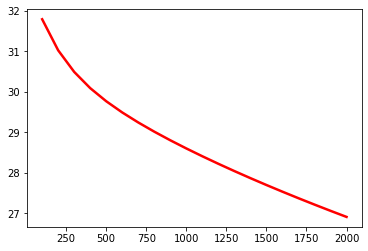

In [8]:
w_gd, idx_gd, err_gd = solve_via_gradient_descent( X=x_in, y=y_target)

## Minibatch Gradient Descent

The optimization problem in ML often has a **sum** structure in the sense
$$
C(\mathbf{w})=\frac{1}{n}\sum_{i=1}^nC_i(\mathbf{w}),
$$
where $C_i(\mathbf{w})$ is the loss of the model $\mathbf{w}$ on the $i$-th example. In our Boston House Price prediction problem, $C_i$ takes the form $C_i(\mathbf{w})=\frac{1}{2}(\mathbf{w}^\top\mathbf{x}^{(i)}-y^{(i)})^2$.

Gradient descent requires to go through all training examples to compute a single gradient, which may be time consuming if the sample size is large. Minibatch gradient descent improves the efficiency by using a subset of training examples to build an **approximate** gradient. At each iteration, it first randomly draws a set $I\subset\{1,2,\ldots,n\}$ of size $s$, where we often call $s$ the minibatch size. Then it builds an approximate gradient by
$$
\nabla^I(\mathbf{w}^{(t)})=\frac{1}{s}\sum_{i\in I}\nabla C_i(\mathbf{w}^{(t)})
$$
Now, it updates the model by
$$
\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}-\eta_t\nabla^I(\mathbf{w}^{(t)}).
$$ 
It is recommended to use $s\in[20,100]$. Depending on different $s$, minibatch gradient descent recovers several algorithms
\begin{align*}
  s<n \;&\Rightarrow\;\text{Minibatch gradient descent}\\
  s=1 \;&\Rightarrow\;\text{Stochastic gradient descent}
\end{align*}
In the following, we request you to finish the following implementation of the `minibatch gradient descent` on the linear regression problem. To search a subset of $\{1,2,\ldots,n\}$, we recommend you to use the function `random.sample`. The synatx is `random.sample(sequence, k)`, which returns $k$ length new list of elements chosen from the `sequence`. More details can be found  [here](https://www.geeksforgeeks.org/python-random-sample-function/)

In [10]:
def solve_via_minibatch(X, y, print_every=100,
                               niter=5000, eta=0.2, batch_size=50):
    '''
    Solves for linear regression weights with nesterov momentum.
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
          `print_every` - we report performance every 'print_every' iterations
          `niter` - the number of iterates allowed
          `eta` - learning rate
          `batch_size` - the size of minibatch
    Return 
        `w` - weights after `niter` iterations
        `idx_res` - the indices of iterations where we compute the cost
        `err_res` - the cost at iterations
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    idx_res = []
    err_res = []
    tset = list(range(N))
    for k in range(niter):
        # TODO: Insert your code to update w by minibatch gradient descent
        idx = random.sample(tset, batch_size)
        #sample batch of data
        sample_X = X[idx, :]
        sample_y = y[idx]
        w = w - eta * gradfn(w, sample_X, sample_y)      
        
        if k % print_every == print_every - 1:
            t_cost = cost(w, X, y)
            print('error after %d iteration: %s' % (k + 1, t_cost))
            idx_res.append(k + 1)
            err_res.append(t_cost)
    return w, idx_res, err_res

Now we apply minibatch gradient descent to solve the Boston House Price prediction problem.

In [11]:
w_batch, idx_batch, err_batch = solve_via_minibatch( X=x_in, y=y_target)

error after 100 iteration: 33.29805704287344
error after 200 iteration: 32.49016823396448
error after 300 iteration: 32.19616370170472
error after 400 iteration: 31.98275870230581
error after 500 iteration: 31.924233818420223
error after 600 iteration: 31.635186850963485
error after 700 iteration: 31.48624741330952
error after 800 iteration: 31.30473866397795
error after 900 iteration: 31.28298737948613
error after 1000 iteration: 31.086129515671683
error after 1100 iteration: 30.90372420586553
error after 1200 iteration: 30.78867782063666
error after 1300 iteration: 30.716962069099306
error after 1400 iteration: 30.56641684287416
error after 1500 iteration: 30.4893117398147
error after 1600 iteration: 30.49277550745683
error after 1700 iteration: 30.340621497014904
error after 1800 iteration: 30.28700565597937
error after 1900 iteration: 30.303152629850505
error after 2000 iteration: 30.118977445935325
error after 2100 iteration: 30.037361375429622
error after 2200 iteration: 29.95937

### Comparison between Minibatch Gradient Descent and Gradient Descent

We can now compare the behavie of Minibatch Gradient Descent and Gradient Descent. In particular, we will show how the `cost` of models found by the algorithm at different iterations would behave with respect to the iteration number.

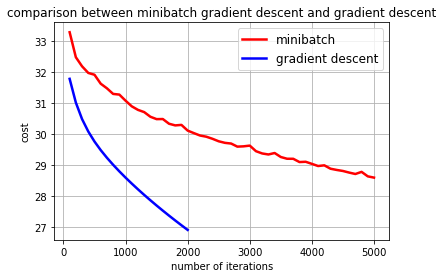

In [12]:
plt.plot(idx_batch, err_batch, color="red", linewidth=2.5, linestyle="-", label="minibatch")
plt.plot(idx_gd, err_gd, color="blue", linewidth=2.5, linestyle="-", label="gradient descent")
plt.legend(loc='upper right', prop={'size': 12})
plt.title('comparison between minibatch gradient descent and gradient descent')
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.grid()
plt.show()      